## はじめに
学習を始める前より、会計データによる企業分析を実施したいと感じていた。  
半年間の学習内容を活用して、実際にまとめを行う。


## 解決したい課題
世の中には様々な業種があるが、その中でも規模や取り扱うサービスにより業績は異なる。  
そのため、一度に業界全体の状態を判断することは難しい。  
細分化を行うことにより、全体としてどのような傾向があるかを確認する。

## 必要なライブラリのインストール


*   yfinance
*   pandas
*   numpy
*   matplotlib
*   sklearn
*   yfinance
*   translate



In [1]:
!pip install yfinance
!pip install japanize-matplotlib
!pip install translate

In [2]:
# ライブラリのインポート
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import japanize_matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from translate import Translator

## 使用するデータ
東京証券取引所より業種分類ごとの銘柄データ(https://www2.jpx.co.jp/tseHpFront/JJK010020Action.do)  
yfinanceより前期、前々期の損益計算書の増減率

In [3]:
# csvファイルの読み込み
file_path = '/content/drive/MyDrive/Private/SAMURAI/Python/graduation_work/electronic_equipment_industory_2410010736.csv'
data = pd.read_csv(file_path, encoding = 'Shift-JIS')
data

,コード?image,銘柄名,市場区分?image,業種分類?image,決算期?image,Unnamed: 5,注意情報等,基本情報,株価表示
0,31050,日清紡ホールディングス,プライム,電気機器,12月,NaN,NaN,NaN,株価表示
1,40620,イビデン,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
2,49020,コニカミノルタ,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
3,64480,ブラザー工業,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
4,64790,ミネベアミツミ,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
...,...,...,...,...,...,...,...,...,...
124,77510,キヤノン,プライム,電気機器,12月,NaN,NaN,NaN,株価表示
125,77520,リコー,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
126,79650,象印マホービン,プライム,電気機器,11月,NaN,NaN,NaN,株価表示
127,80350,東京エレクトロン,プライム,電気機器,3月,NaN,NaN,NaN,株価表示


In [4]:
# 証券コードと銘柄名のカラムの名称を変更
rename_dict = {'コード?image': 'code', '銘柄名' : 'name'}
stock_df = data.rename(columns=rename_dict)
stock_df

,code,name,市場区分?image,業種分類?image,決算期?image,Unnamed: 5,注意情報等,基本情報,株価表示
0,31050,日清紡ホールディングス,プライム,電気機器,12月,NaN,NaN,NaN,株価表示
1,40620,イビデン,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
2,49020,コニカミノルタ,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
3,64480,ブラザー工業,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
4,64790,ミネベアミツミ,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
...,...,...,...,...,...,...,...,...,...
124,77510,キヤノン,プライム,電気機器,12月,NaN,NaN,NaN,株価表示
125,77520,リコー,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
126,79650,象印マホービン,プライム,電気機器,11月,NaN,NaN,NaN,株価表示
127,80350,東京エレクトロン,プライム,電気機器,3月,NaN,NaN,NaN,株価表示


In [5]:
# 最新の財務情報の取得関数を定義・実行
def get_income(df):
    income_df = pd.DataFrame()

    for index,row in df.iterrows():
        stock_code = str(row['code'])[:-1] + '.T'
        stock_name = row['name']

        ticker = yf.Ticker(stock_code)

        income = ticker.income_stmt.iloc[:, [0,1]]
        income_diff =income.pct_change(-1, axis=1).iloc[:, [0]]

        income_df[stock_name] =income_diff

    return income_df

df = get_income(stock_df)

<ipython-input-5-1c7b0327f7cc>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  income_diff =income.pct_change(-1, axis=1).iloc[:, [0]]
<ipython-input-5-1c7b0327f7cc>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  income_diff =income.pct_change(-1, axis=1).iloc[:, [0]]
<ipython-input-5-1c7b0327f7cc>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

## 欠損値の処理
欠損値を含む指標を削除する

(44, 129)

,NaN
日清紡ホールディングス,1
イビデン,2
コニカミノルタ,9
ブラザー工業,9
ミネベアミツミ,9
...,...
キヤノン,8
リコー,6
象印マホービン,3
東京エレクトロン,5


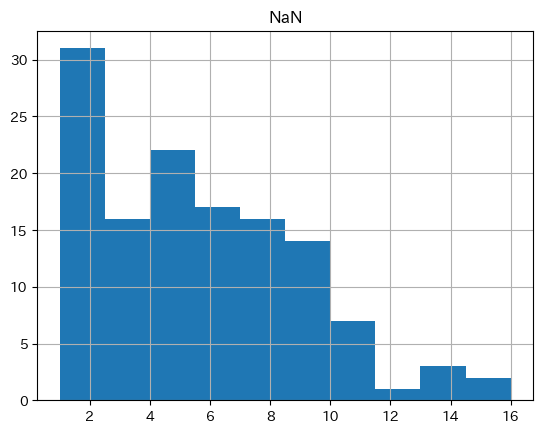

In [6]:
# データフレームの行列数と欠損数を確認
def nan_check(df,bins=10):
    display(df.shape)
    nan_df = pd.DataFrame(df.isnull().sum().rename('NaN'))
    display(nan_df)
    nan_df.hist(bins=bins)

nan_check(df)

In [7]:
# 欠損値を含む指標を削除
def del_nan_index(df):
    df.dropna(axis=0, inplace=True)
    display(df.shape)
    display(df.head())
    return df

df = del_nan_index(df)

(23, 129)

,日清紡ホールディングス,イビデン,コニカミノルタ,ブラザー工業,ミネベアミツミ,日立製作所,三菱電機,富士電機,安川電機,シンフォニアテクノロジー,...,市光工業,小糸製作所,ミツバ,ＳＣＲＥＥＮホールディングス,キヤノン電子,キヤノン,リコー,象印マホービン,東京エレクトロン,イノテック
Tax Rate For Calcs,-0.546256,0.230483,0.000000,0.266120,0.316258,0.697479,-0.181504,-0.010188,0.082759,0.075697,...,7.863636,-0.186481,-0.335151,-0.067164,-0.146835,0.038168,0.112878,-0.192361,-0.057481,0.125562
Normalized EBITDA,-0.039067,-0.255780,-7.586907,-0.009664,-0.093336,-0.035308,0.133350,0.190788,0.006424,-0.078189,...,0.256429,0.191626,0.635044,0.215591,-0.027524,0.089196,-0.004040,0.126594,-0.246127,0.134537
Net Income From Continuing Operation Net Minority Interest,-2.015451,-0.396593,-1.043828,-0.190292,-0.261333,-0.091243,0.332110,0.228288,-0.021165,-0.073104,...,0.772100,0.378254,10.595781,0.227653,-0.051156,0.084243,-0.187448,0.214051,-0.228212,-0.113352
Reconciled Depreciation,-0.036789,-0.161744,0.006362,0.116547,0.100656,-0.142093,-0.060858,0.129239,0.084532,0.078255,...,0.022871,0.064757,-0.038624,0.231617,-0.104024,0.053794,0.118593,0.150280,0.216197,0.062276
Reconciled Cost Of Revenue,0.052663,-0.075829,0.016865,-0.056674,0.092478,-0.127615,0.032052,0.092006,0.007169,-0.057922,...,0.052729,0.097193,0.043728,0.054332,0.000646,0.003835,0.100904,-0.003215,-0.183208,0.068612


## データの変形
データを転置し、各カラムを指標として標準化を行う。

In [8]:
# データフレームの転置
df = df.T
df

,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Normalized Income,Net Income From Continuing And Discontinued Operation,Total Expenses,...,Net Income Including Noncontrolling Interests,Net Income Continuous Operations,Tax Provision,Pretax Income,Operating Income,Operating Expense,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
日清紡ホールディングス,-0.546256,-0.039067,-2.015451,-0.036789,0.052663,-0.836551,-1.629638,-0.159539,-2.015451,0.056141,...,-1.986241,-1.986291,-1.385695,-1.850027,-0.193197,0.070091,0.034860,0.052663,0.048686,0.048686
イビデン,0.230483,-0.255780,-0.396593,-0.161744,-0.075829,-0.258367,-0.331987,-0.387991,-0.396593,-0.064438,...,-0.394253,-0.394246,-0.186800,-0.338442,-0.342634,-0.004533,-0.196400,-0.075829,-0.112653,-0.112653
コニカミノルタ,0.000000,-7.586907,-1.043828,0.006362,0.016865,-7.586907,-1.317675,-1.043828,-1.043828,-0.074757,...,-1.040447,-1.040447,3.817901,-1.133167,-1.274289,-0.176373,0.038550,0.016865,0.026187,0.026187
ブラザー工業,0.266120,-0.009664,-0.190292,0.116547,-0.056674,-0.009664,-0.096422,-0.190292,-0.190292,0.017433,...,-0.189940,-0.189961,0.167637,-0.077783,-0.100870,0.156463,0.111873,-0.056674,0.009397,0.009397
ミネベアミツミ,0.316258,-0.093336,-0.261333,0.100656,0.092478,-0.093336,-0.196620,-0.261333,-0.261333,0.112096,...,-0.246519,-0.246519,0.079332,-0.180000,-0.246017,0.283013,0.049053,0.092478,0.085067,0.085067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
キヤノン,0.038168,0.089196,0.084243,0.053794,0.003835,0.089196,0.111880,0.084243,0.084243,0.034690,...,0.093574,0.093574,0.151479,0.108748,0.062159,0.080806,0.077201,0.003835,0.037098,0.037098
リコー,0.112878,-0.004040,-0.187448,0.118593,0.100904,-0.004040,-0.137720,-0.170476,-0.187448,0.112376,...,-0.204867,-0.204867,-0.066506,-0.161190,-0.205152,0.136277,0.100179,0.100904,0.100651,0.100651
象印マホービン,-0.192361,0.126594,0.214051,0.150280,-0.003215,0.134608,0.129283,0.202873,0.214051,0.008026,...,0.250891,0.250822,-0.089190,0.127999,0.071811,0.039862,0.045827,-0.003215,0.011632,0.011632
東京エレクトロン,-0.057481,-0.246127,-0.228212,0.216197,-0.183208,-0.230236,-0.261381,-0.245324,-0.228212,-0.136390,...,-0.228212,-0.228210,-0.285747,-0.242323,-0.261381,0.019971,-0.156580,-0.183208,-0.171342,-0.171342


In [9]:
# 標準化
def scaled(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)
    return scaled_df

df = scaled(df)
df.head()

,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Normalized Income,Net Income From Continuing And Discontinued Operation,Total Expenses,...,Net Income Including Noncontrolling Interests,Net Income Continuous Operations,Tax Provision,Pretax Income,Operating Income,Operating Expense,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
日清紡ホールディングス,-0.813807,-0.086958,-0.970324,-0.868726,0.260558,-0.485501,-1.158247,-0.021185,-0.970361,0.249287,...,-1.070732,-1.071060,-0.578501,-0.096168,-0.272228,0.220566,0.069092,0.260558,0.235223,0.235223
イビデン,0.189443,-0.273618,-0.140850,-1.914161,-0.917647,-0.096471,-0.256299,-0.096198,-0.141252,-1.019556,...,-0.139035,-0.138562,-0.025647,0.087176,-0.433808,-0.677666,-1.127987,-0.917647,-1.147705,-1.147705
コニカミノルタ,-0.108253,-6.588062,-0.472482,-0.507703,-0.067686,-5.027461,-0.941414,-0.311545,-0.472738,-1.128140,...,-0.517214,-0.517057,1.821068,-0.009219,-1.441176,-2.746072,0.088193,-0.067686,0.042374,0.042374
ブラザー工業,0.235472,-0.061633,-0.035145,0.414168,-0.741999,0.070868,-0.092567,-0.031282,-0.035594,-0.158037,...,-0.019463,-0.018907,0.137797,0.118792,-0.172398,1.260211,0.467736,-0.741999,-0.101546,-0.101546
ミネベアミツミ,0.300232,-0.133701,-0.071545,0.281216,0.625642,0.014569,-0.162211,-0.054609,-0.071978,0.838096,...,-0.052575,-0.052034,0.097076,0.106394,-0.329339,2.783462,0.142564,0.625642,0.547069,0.547069


## 変数の削減
分類結果を視覚的に分かりやすくするために  
主成分分析を行い、特徴量を２つにまとめることで平面上にプロットできる形にしておく  


array([0.32914398, 0.25736891])

,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Normalized Income,Net Income From Continuing And Discontinued Operation,Total Expenses,...,Net Income Including Noncontrolling Interests,Net Income Continuous Operations,Tax Provision,Pretax Income,Operating Income,Operating Expense,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
0,0.017674,0.052153,0.339781,0.023650,0.143416,0.070711,0.037073,0.160811,0.339806,0.147197,...,0.332209,0.332214,0.033335,0.081924,0.07175,0.098426,0.159107,0.143416,0.166350,0.166350
1,0.007029,0.087608,-0.137238,0.159167,0.350782,0.122433,0.069101,-0.187957,-0.137217,0.352475,...,-0.142391,-0.142438,0.024232,-0.080795,0.22867,0.122368,0.281885,0.350782,0.355643,0.355643


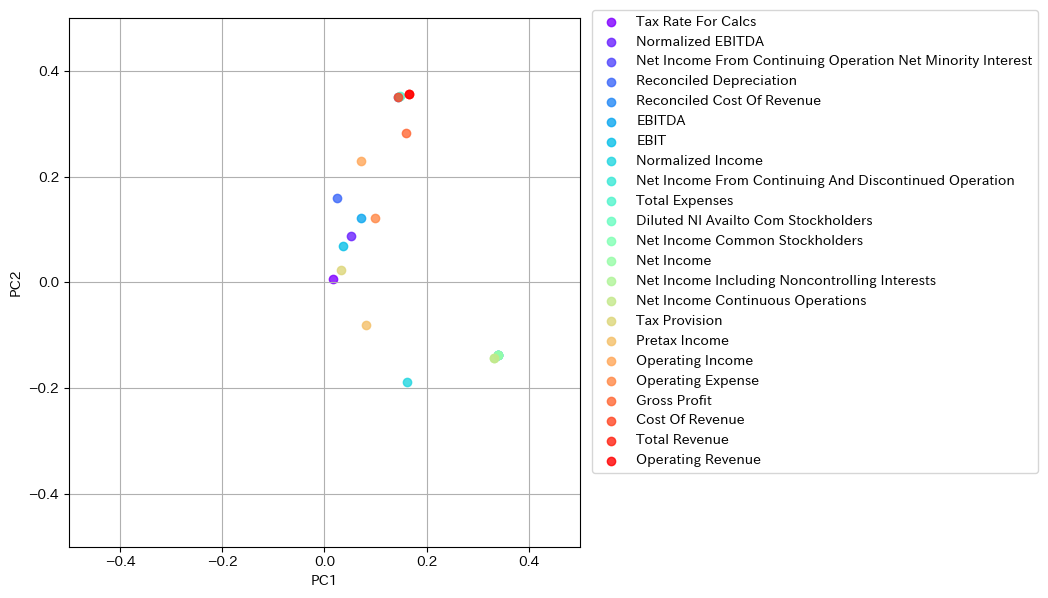

In [10]:
# 主成分分析を行う
def get_pca_2(df):

    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(df)
    display(pca.explained_variance_ratio_)

    display(pd.DataFrame(pca.components_, columns=df.columns))

    colors = cm.rainbow(np.linspace(0, 1, pca.components_[0].shape[0]))


    fig, axes = plt.subplots(figsize=(6, 6), tight_layout=True)

    for x, y, name, color in zip(pca.components_[0], pca.components_[1], df.columns, colors):
        axes.scatter(x, y, alpha=0.8, color=color, label=name)

    axes.grid()
    axes.set_xlabel('PC1')
    axes.set_ylabel('PC2')

    axes.set_xlim([-0.5, 0.5])
    axes.set_ylim([-0.5, 0.5])
    fig.legend(bbox_to_anchor=(1.75, 1))

    plt.show()

    return pca_data

pca_data = get_pca_2(df)


特徴量がそれぞれの主成分に与える影響をプロットすることにより下記のことが分かる。  
*   Net Income pca1に大きなプラス、pca2にマイナス影響  
*   Operating Revenue pca2に大きなプラス影響 pca1にもプラス影響あり  
*   EBITDA pca2へのプラス影響  
*   Pretax income, Normalized EBITDA 0付近


## クラスタリング
エルボー法によりクラスタ数を決定し、kmeansによるクラスタリングを行う。  
今回のクラスタ数は６とした。

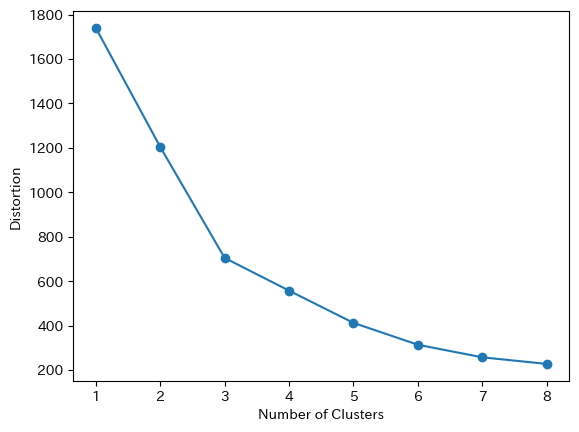

In [11]:
# クラスタリングを行うためのクラスター数をkmeansで確認
def plot_elbow_cluster(pca_data, max_cluster=10):
    distortions = []

    max_range = max_cluster - 1
    for i in range(1, max_range):
        kmeans = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, random_state=0)
        kmeans.fit(pca_data)
        distortions.append(kmeans.inertia_)

    plt.plot(range(1, max_range), distortions, marker='o')
    plt.xticks(range(1, max_range))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

plot_elbow_cluster(pca_data)

In [12]:
# kmeansでのクラスタリングを実行
def kmeans_clustering(pca_data, cluster):
    kmeans = KMeans(n_clusters=cluster, init='random', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(pca_data)

    cluster = kmeans.labels_
    cluster_df = pd.DataFrame(data=pca_data, columns=['pca_1', 'pca_2'])
    cluster_df['cluster'] = cluster
    display(cluster_df.head())

    return cluster_df, cluster

cluster_df, cluster = kmeans_clustering(pca_data, 6)

,pca_1,pca_2,cluster
0,-2.304607,1.099624,5
1,-1.486193,-2.529614,4
2,-2.415779,-1.819994,4
3,-0.135237,-0.307957,5
4,0.604127,1.522915,3


## 結果の可視化
クラスターごとに色分けを行いプロットを行う。

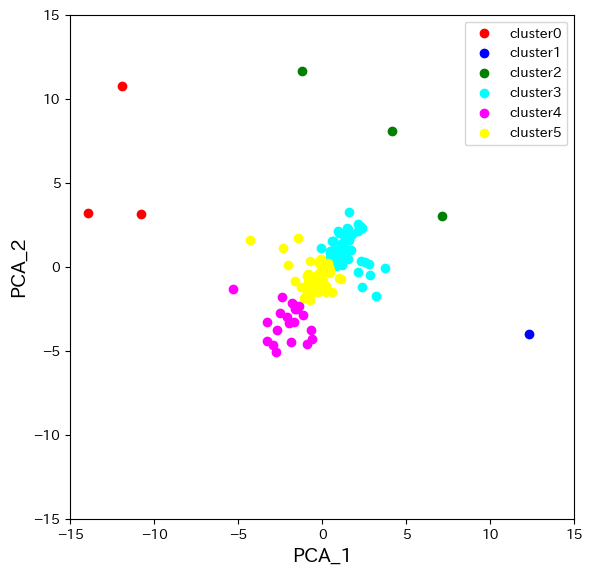

In [13]:
# 結果の可視化
cluster_color = {'0' : 'red', '1' : 'blue', '2' : 'green', '3' : 'cyan', '4' : 'magenta', '5' : 'yellow'}

fig, axes = plt.subplots(figsize=(6, 6), tight_layout=True)
for i in np.unique(cluster):
    pca1, pca2 = cluster_df['pca_1'][cluster_df['cluster'] == i], cluster_df['pca_2'][cluster_df['cluster'] == i]
    axes.scatter(pca1, pca2, color=cluster_color[str(i)], label=f'cluster{i}')

axes.set_xlabel('PCA_1', fontsize=14)
axes.set_ylabel('PCA_2', fontsize=14)
axes.set_xlim([-15, 15])
axes.set_ylim([-15, 15])
axes.set_aspect('equal')


axes.legend()
plt.show()

プロットの結果により下記の特徴が見受けられる。  
*   cluster0: PCA1が大きくマイナス PCA2がプラス傾向  
*   cluster1: PCA1が大きくプラス PCA2がマイナス傾向  
*   cluster2: PCA1プラス PCA2が大きくプラス傾向  
*   cluster3: PCA1がプラス PCA2がプラス傾向  
*   cluster4: PCA1がマイナス PCA2がマイナス傾向  
*   cluster5: PCA1が0 PCA2も0傾向  

## クラスターごとの増減率を確認
各クラスターでの増減率平均を確認する。

In [14]:
# 指標ごとの増減率の平均値を確認
df['cluster'] = cluster

pd.set_option('display.max_columns', None)
df.groupby('cluster').mean().style.bar(axis=0)

,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Normalized Income,Net Income From Continuing And Discontinued Operation,Total Expenses,Diluted NI Availto Com Stockholders,Net Income Common Stockholders,Net Income,Net Income Including Noncontrolling Interests,Net Income Continuous Operations,Tax Provision,Pretax Income,Operating Income,Operating Expense,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,-0.108253,0.268950,-4.904476,-0.162667,0.011639,-0.075353,1.575571,-1.363184,-4.902782,-0.105872,-4.902808,-4.902808,-4.902782,-5.336199,-5.339178,-0.614596,-2.431304,1.642172,-0.546009,-0.049437,0.011639,-0.000460,-0.000460
1,-0.541140,0.493667,5.491444,-0.884075,0.178626,0.409482,1.097561,3.883810,5.488564,0.002352,5.488600,5.488600,5.488564,2.700704,2.702603,0.040565,0.390513,2.259487,-1.345514,1.495982,0.178626,0.479329,0.479329
2,-0.394971,0.592912,0.302801,1.461453,3.452247,1.006137,-1.032540,-2.629544,0.302204,3.143615,0.302210,0.302210,0.302204,0.147083,0.147926,0.614972,0.080171,2.354699,-0.449408,2.696762,3.452247,3.131211,3.131211
3,0.098818,0.137469,0.280130,0.188369,0.512686,0.224288,0.195819,0.225185,0.280575,0.560973,0.280572,0.280572,0.280575,0.338263,0.337802,0.006831,0.012138,0.246387,0.495716,0.514077,0.512686,0.613300,0.613300
4,-0.143986,-0.742849,-0.203237,-0.353906,-1.448621,-0.780525,-0.331478,-0.139973,-0.203612,-1.531844,-0.203609,-0.203609,-0.203612,-0.211619,-0.211221,-0.144261,0.073471,-0.677792,-0.862291,-1.220216,-1.448621,-1.524040,-1.524040
5,-0.015278,0.105753,-0.085255,-0.151295,-0.229885,0.004197,-0.165654,-0.047137,-0.085682,-0.220541,-0.085678,-0.085679,-0.085682,-0.053689,-0.053156,0.060270,0.102698,-0.332719,-0.146782,-0.316975,-0.229885,-0.312516,-0.312516


上記より下記の点を読み取ることができた。  


*   クラスター0: Operating Revenueの変動は少ないが,Net Incomeは大きく減少傾向にある
*   クラスター1: Operating Revenueは増加傾向にあり,Net Incomeも大きく増加傾向にある
*   クラスター2: Operating Revenueは大きく増加傾向にあるが, Net Incomeの変動が少ない
*   クラスター3: Operating Revenueは増加傾向にあり, Net Incomeも増加している
*   クラスター4: Operating Revenueは大きく減少傾向にあり, Net Incomeも減少している
*   クラスター5: Operating Revenueは減少傾向にあるが, Net Incomeの変動が少ない










## 各クラスターの特徴をまとめる
指標の変動から、クラスターごとの特徴をまとめる

In [15]:
# 特徴を見出したカラムを抽出
df = df.loc[:, ['cluster', 'Operating Revenue', 'Net Income']]

In [16]:
# 指標を日本語に変換
def translate_list(list):
    translator = Translator(from_lang='en', to_lang='ja')
    result = []

    for word in list:
        result.append(translator.translate(word))
    return result

columns_list = list(df.columns)
columns_list = translate_list(columns_list)

In [17]:
display(columns_list)

['クラスター', '営業収益のうち', '当期純利益']

In [18]:
# 日本語化した結果を確認
df.columns = columns_list
df.groupby('クラスター').mean().style.bar(axis=0)

,営業収益のうち,当期純利益
クラスター,,
0,-0.000460,-4.902782
1,0.479329,5.488564
2,3.131211,0.302204
3,0.613300,0.280575
4,-1.524040,-0.203612
5,-0.312516,-0.085682


*    クラスター0 : 営業収益は変わらないが当期純利益が大きく減少しているため、営業外で損失があったと考えられる。
*    クラスター1 : 営業収益の増加率以上に、当期純利益が増加しているため生産性の向上により費用が削減されていることが考えらえる。
*   クラスター2 : 営業収益は大きく増加しているが、当期純利益の増加率が低いため、利益率の低いクラスターであることが考えられる。
*   クラスター3 : 営業収益、当期純利益がともに増加しており、好業績なクラスターであることが考えられる。
*   クラスター4 : 営業収益が大きく減少しているが、当期純利益の減少幅はそれ以下で収まっているため、営業外の収益で補填していることが考えらえる。
*   クラスター5 : 営業収益が減少しているが、当期純利益の変動がほとんど見られないため、効率化により対処を行っていることが考えられる。

In [21]:
df.groupby('クラスター').count()

,営業収益のうち,当期純利益
クラスター,,
0,3,3
1,1,1
2,3,3
3,58,58
4,21,21
5,43,43


## 結論
以上のクラスタリングにより  
電気機器業界は好調あるいは、収益が減少している中でも利益を確保できる状態にあるのではないかと考える。

## まとめ
今回の分析により、ありきたりな結論ではあるが、営業収益と当期純利益の変動率が財務諸表に注目する際には重要なことが分かった。  

しかし、欠損値の処理や損益計算書単体での分析で終わってしまっているなど課題も多い。とくに営業外に触れるのであれば、欠損値として処理してしまった指標も分析に組み込んでいれば、また違う結論もあったのではないかと考える。  

実際に分析を行ってみる中で、上記のような課題を見つけることができた。
今後も継続して学習内容を活用していきたい。